# BAD Day 1: Additional comments

# 1. Probability distributions 

These can be either discrete or continuous (e.g. uniform, bernoulli, normal), and are defined by a density function $ p(x) $ or $f(x)$.

## 1.1 Bernoulli distribution Be(p)

Flip a coin $(T = 0,  H = 1)$. The probability of `H` is 0.1

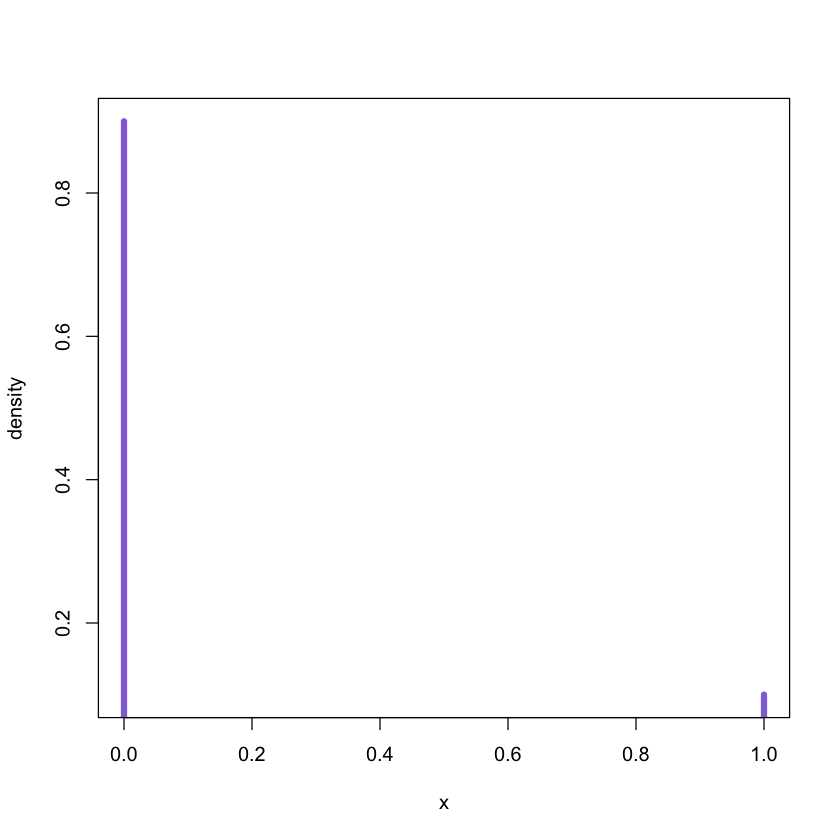

In [1]:
x <- 0:1
f <- dbinom(x, size = 1, prob = .1)

# plotting the distribution
plot(x, f, xlab = "x", ylab = "density", type = "h", lwd = 5, col = 'mediumpurple')

## 1.2 Binomial Random sampling
Generate 100 observations from Be (0.1)

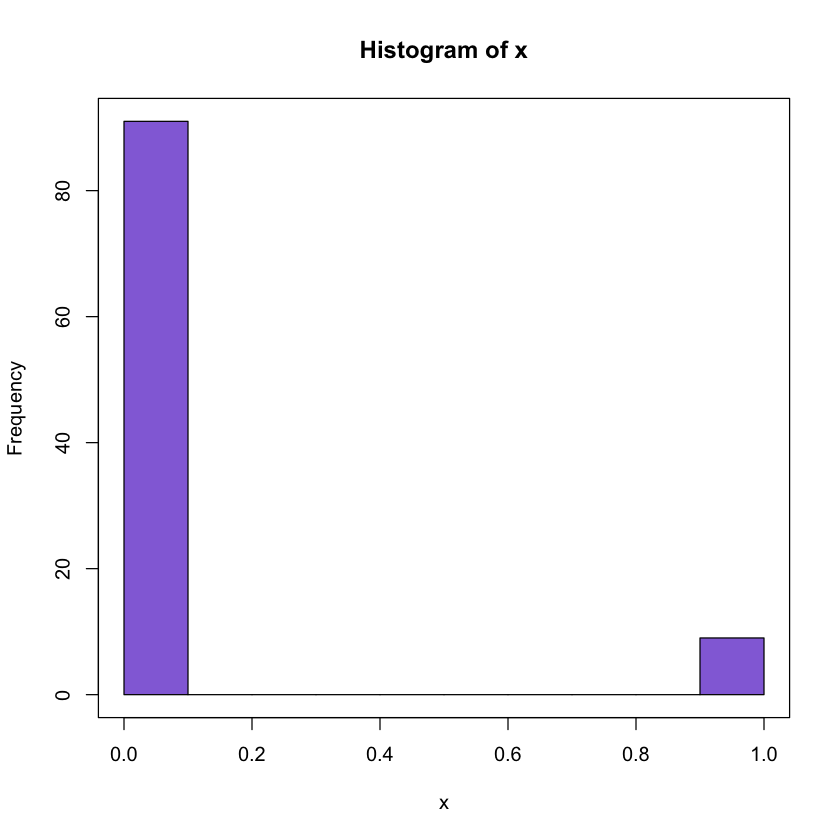

In [2]:
set.seed(100)
x <- rbinom(100, size = 1, prob = .1)

# plotting
hist(x, col = 'mediumpurple')
box()

## 1. 3 Nomal distribution

The data values are members of a normally distributed population with mean $\mu$ and  variance $\sigma^2$.

The value of the distribution function is given by $P(X \leq x)$, the probability of the population to have values smaller than or equal to $x$.

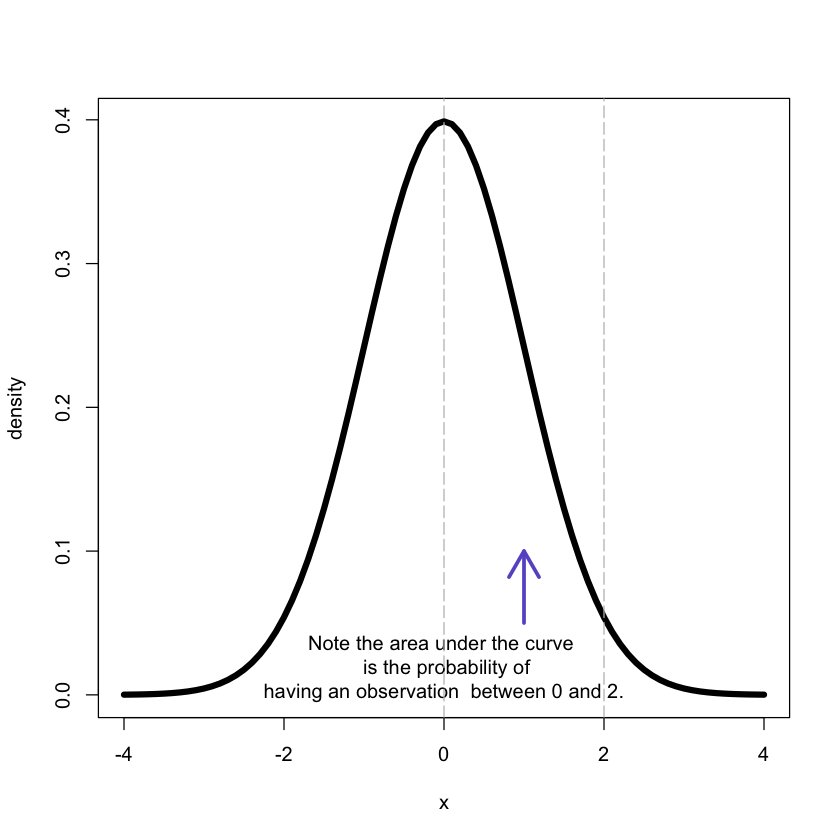

In [3]:
x <- seq(-4,4,.1)
f <- dnorm(x, mean = 0, sd = 1)

# plotting
plot(x, f, xlab = "x", ylab = "density", lwd = 5,type = "l")
arrows(1, 0.05, 1, 0.1, lwd = 3, col = 'slateblue')
text(x = 0, y = 0.02, label = 'Note the area under the curve \n is the probability of
having an observation  between 0 and 2.')

abline(v = c(0,2), col = 'grey', lty = 5)

## 1.4 Normal Random sampling

Generate 1000 observations from N(0,1)

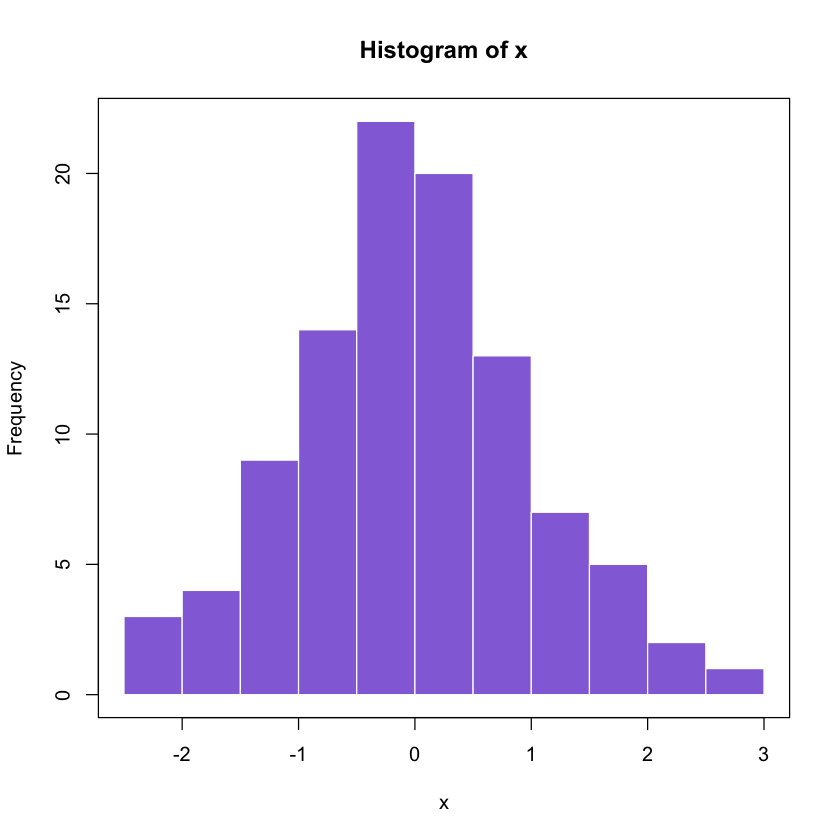

In [4]:
set.seed(100)
x <- rnorm(100, mean = 0, sd = 1)
hist(x, col = 'mediumpurple', border = 'white')
box()

**Histograms can be used to estimate densities!**

## 1.5 Overview

For practical computations R has built-in functions for the binomial, normal, Chi-squared distributions, among others. Where `d` stands for density, `p` for (cumulative) probability distribution, `q` for quantiles, and `r` for drawing random samples e.g.


| Distribution | parameters    | density                 | distributon             | random sampling          | quantiles                     |
|--------------|---------------|-------------------------|-------------------------|--------------------------|-------------------------------|
| Binomial     | n, p          | dbinom(x, n, p)         | pbinom(x, n, p)         | rbinom(10, n, p)         | qbinom($\alpha$, n, p)        |
| Normal       | $\mu, \sigma$ | dnorm(x, $\mu, \sigma$) | pnorm(x, $\mu, \sigma$) | rnorm(10, $\mu, \sigma$) | qnorm($\alpha$,$\mu, \sigma$) |
| Chi-squared  | m             | dchisq(x, m)            | pchisq(x, m)            | rchisq(10,m)             | qchisq($\alpha$, m)           |

#  2. Descriptive statistics 

## 2.1 Quantiles

###  (Theoretical) quantiles:
The *p-quantile* is the value with the property that there is a probability *p* of getting  a value less than or equal to it.

In [5]:
q90<-qnorm(.90, mean = 0, sd = 1)
x<-seq(-4,4,.1)
f<-dnorm(x, mean = 0, sd = 1)

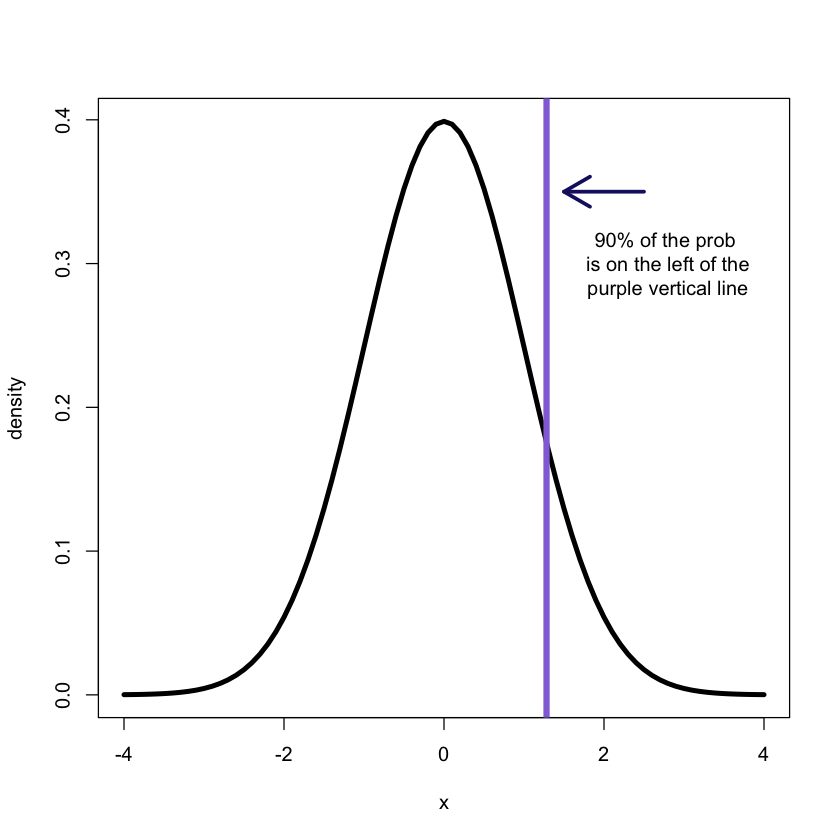

In [6]:
# plotting
plot(x, f, xlab = "x", ylab = "density", type = "l", lwd = 4)
abline(v = q90, col = 'mediumpurple', lwd = 5)
arrows(2.5, 0.35, 1.5, 0.35, lwd = 3, col = 'midnightblue')
text(x = 2.8, y = 0.3, label ='90% of the prob \n is on the left of the 
purple vertical line');

### Empirical quantiles:

The *p-quantile* is the value with the property that p%  of the observations are less than or equal to it.

They can be easily obtained in R:

In [7]:
x<-rnorm(100, mean = 0, sd = 1)
quantile(x)

0%         25%         50%         75%        100% 
-2.13649386 -0.43183004 -0.07287779  0.44619075  2.16860032

In [8]:
quantile(x,probs = c(.1,.2,.9))

10%        20%        90% 
-0.8635261 -0.5166389  1.0197766

## 2.2 Statistical summary 

We often need to quickly `quantify` a data set. This can be done using a **set of summary statistics** (e.g mean, median, variance, standard deviation).

In [9]:
set.seed(100)
x<-rnorm(100, mean = 0, sd = 1)

# Getting the mean
mean(x)

[1] 0.002912563

In [10]:
# Getting the median
median(x)

[1] -0.0594199

In [11]:
# Getting the IQR
IQR(x)

[1] 1.264738

In [12]:
# Getting the variance
var(x)

[1] 1.04185

In [13]:
# Getting a general summary
summary(x)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.272000 -0.608800 -0.059420  0.002913  0.655900  2.582000 

You can use the **summary** function on almost any R object! (remmber R is an object oriented language, hence it comprises methods and classes)

##  2.3 Box-plots: understanding the plots

In [14]:
install.packages('shape')
library('shape')


The downloaded binary packages are in
	/var/folders/1q/xdx6qpy905dbx01t7cfv36280000gn/T//RtmpSyauGl/downloaded_packages


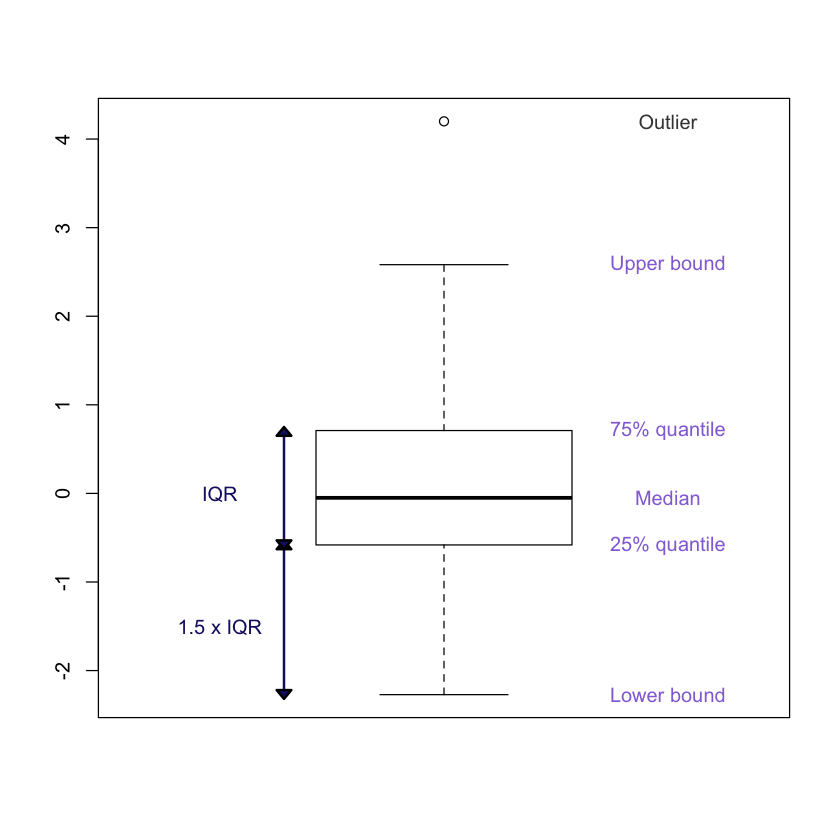

In [15]:
set.seed(100)
x<-rnorm(100, mean = 0, sd = 1)
x = c(4.2, x)  # Adding an outlier for demonstration purposes only
boxplot(x)

# generates labels for the various components
labels <- c('Lower bound', '25% quantile', 'Median', '75% quantile', 
            'Upper bound')
text(y = boxplot.stats(x)$stats, labels = labels, x = 1.35, col = 'mediumpurple')
text(y = 4.2, x = 1.35, label = 'Outlier', col = 'gray26')

# show the inter quantile range
segments(0.75, -2.27, 0.75, 0.7, col = 'midnightblue', lwd = 2)


Arrowhead(c(0.75,0.75),c(-0.58,0.7), angle = 90,
         arr.col = 'midnightblue', arr.length = 0.15, arr.width =0.25,
          arr.type = 'triangle');

Arrowhead(c(0.75, 0.75),c(-0.58, -2.27), angle = 270,
         arr.col = 'midnightblue', arr.length = 0.15, arr.width =0.25,
          arr.type = 'triangle');

text(y = c(0,-1.5), x = c(0.65, 0.65), label = c('IQR', '1.5 x IQR'),
     col = 'midnightblue')

The median of the sampple is denoted by the horizontal line within the boxplot. The IQR corresponds to 
IQR = 75% quantile -25% quantile 


In [16]:
IQR(x)

[1] 1.291372

## 2.4 QQ plot

Many statistical methods make some assumptions about the distribution of the data.

The quantile quantile (QQ) plot provides a mean to visually verify such assumptions. 

Also, the QQ-plot shows the theoretical quantile versus the empirical quantiles. If the distribution assumed (theoreticall) is indeed correct, the result will be a straight line. 

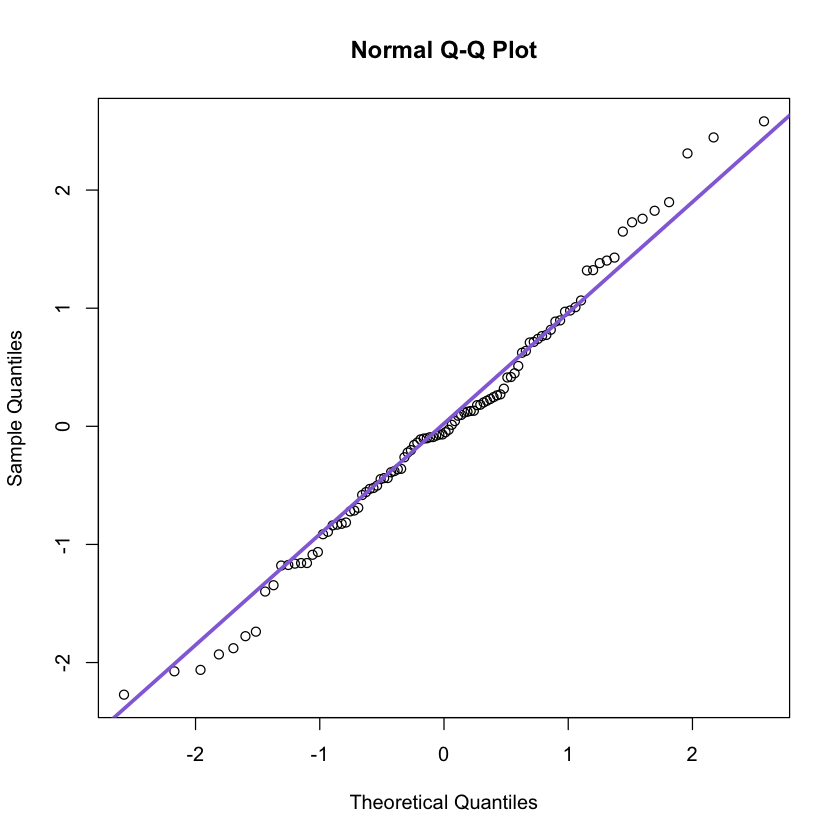

In [17]:
set.seed(100)
x<-rnorm(100, mean = 0, sd = 1)
qqnorm(x)
qqline(x, col = 'mediumpurple', lwd = 3)

Note this is valid only for normal distributions!

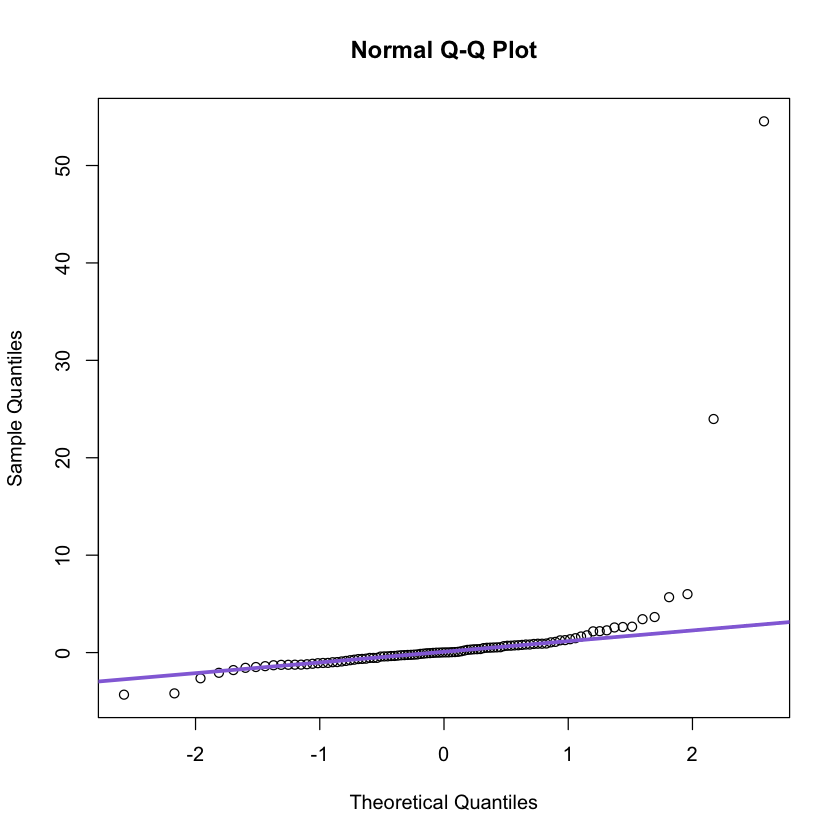

In [18]:
set.seed(100)
x<-rt(100, df = 2)

qqnorm(x)
qqline(x, col = 'mediumpurple', lwd = 3)

#### Clearly the `t` distribution with two degres of freedom is different from the normal distribution. 

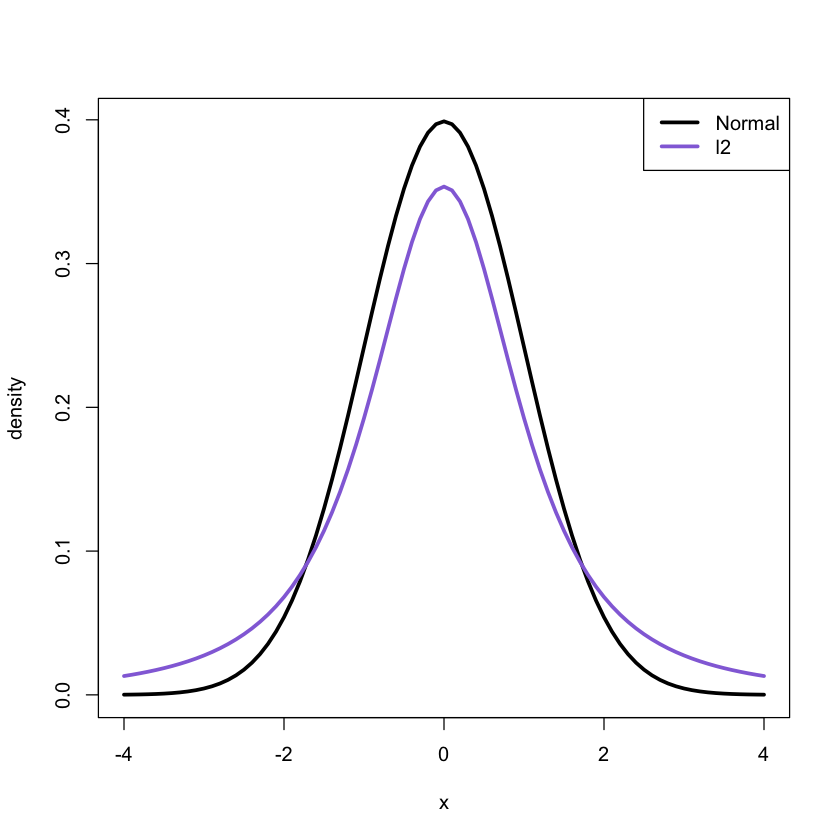

In [19]:
x<-seq(-4,4,.1)
f1<-dnorm(x, mean = 0, sd = 1)
f2<-dt(x, df = 2)

plot(x, f1, xlab = "x", ylab = "density",lwd = 3,type = "l")
lines(x, f2, xlab ="x",ylab = "density",lwd = 3,col = 'mediumpurple')
legend('topright', legend = c('Normal', 'l2'), col = c('black', 'mediumpurple'), 
      lwd = 3)

### Comparing two samples


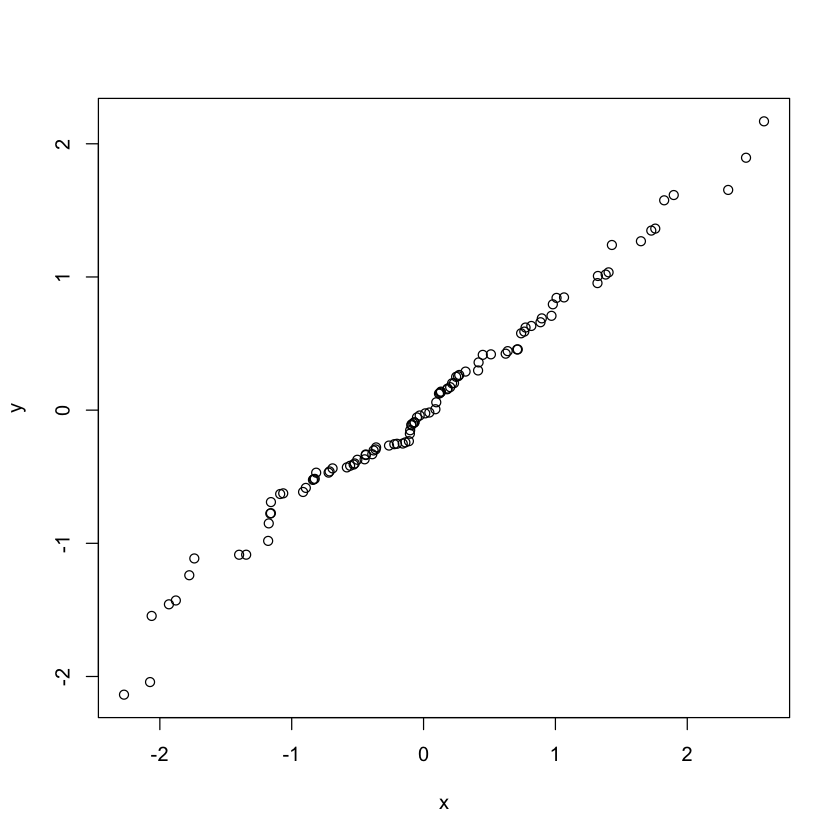

In [20]:
set.seed(100)
x<-rnorm(100, mean = 0, sd = 1)
y<-rnorm(100, mean = 0, sd = 1)
qqplot(x,y)

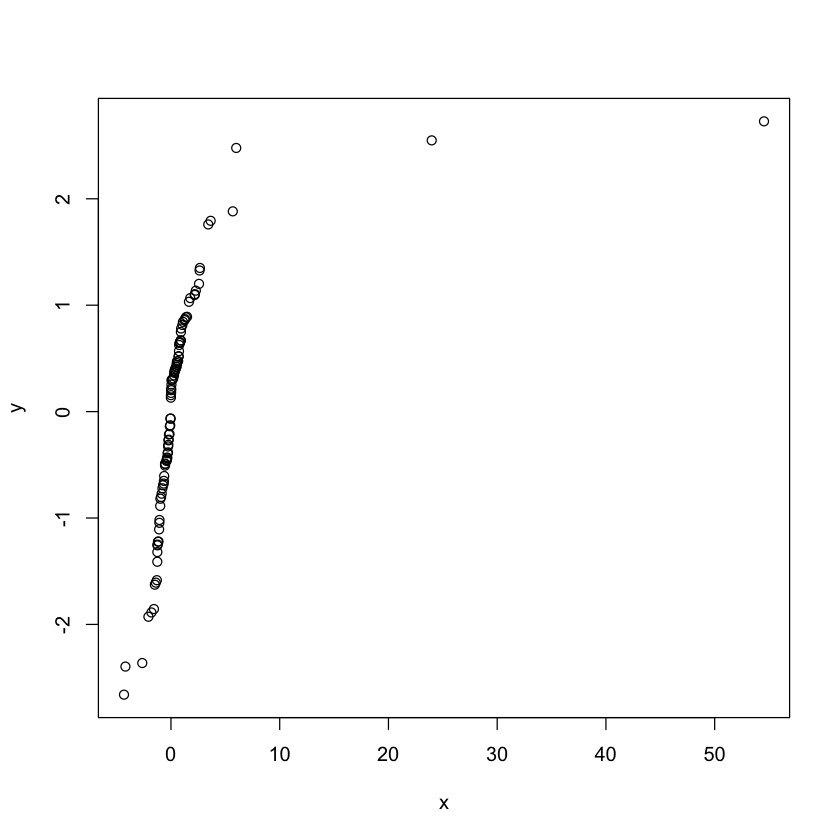

In [21]:
set.seed(100)
x<-rt(100, df = 2)
y<-rnorm(100, mean = 0, sd = 1)
qqplot(x,y)

### Exercise: Try with different values of df

## 2.5 Scatter plots

Biological data sets often contain serveal variables. Hence these data sets are **multivariate**. Scatter plots allow us to look at two variables at a time.

In [22]:
### need to add the plot
### code missing

What can you tell about this data?

This kind of plots can be used to asses independence

## 2.6 Scatter plots vs. correlation 

Note that in the previous example the correlation between the two variables was 0.23

Note that correlation is only good for **linear dependence**.


[1] -0.05328118

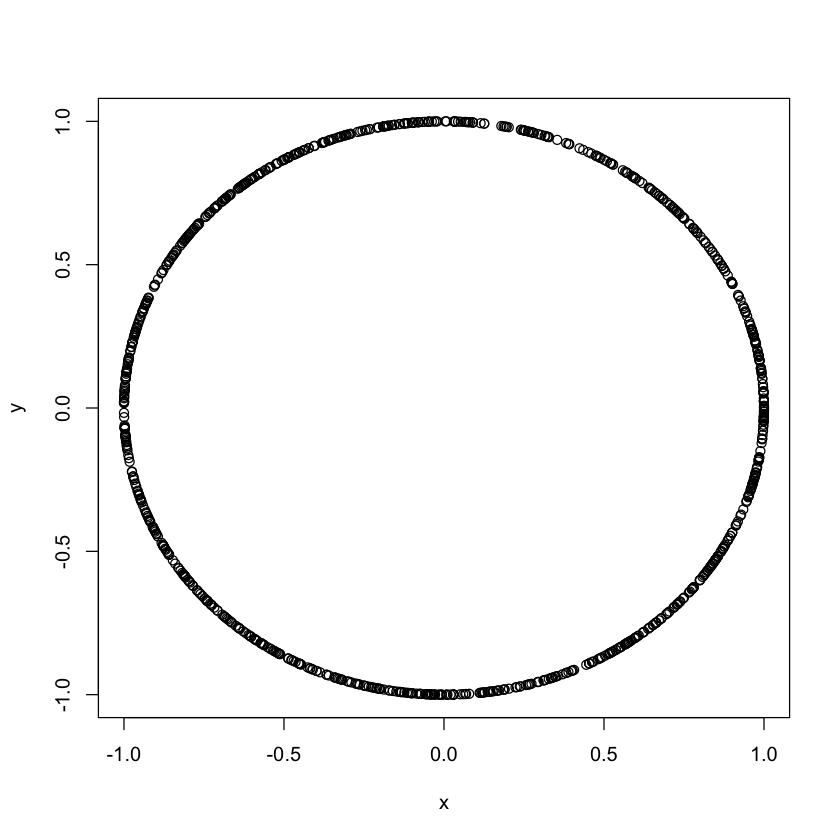

In [23]:
set.seed(100)
theta<-runif(1000, 0, 2*pi)
x<-cos(theta)
y<-sin(theta)
cor(x, y)
plot(x,y) 

What is the correlation?